In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

fname = "/content/drive/My Drive/DC/Data_Level2_BAH_RecyclingDiversion.xls"
fname = '/content/gdrive/My Drive/Level2_BAH_RecyclingDiversion/Data_Level2_BAH_RecyclingDiversion.xlsx'
df=pd.read_excel(fname)
from datetime import datetime
df["YM"] = ["%s-%s"%(FiscalMonth,FiscalYear) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]
df["date"] = [datetime(FiscalYear,FiscalMonth,1) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]
df.set_index("date",inplace=True)
df["dt"] = [datetime(FiscalYear,FiscalMonth,1) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]

In [4]:
df.head()

,Zone,District,FiscalMonth,FiscalYear,MonthName,DiversionRate,CapturePaper,CaptureMGP,CaptureTotal,YM,dt
date,,,,,,,,,,,
2019-10-01,Brooklyn North,BKN01,10,2019,April,14.687093,44.909160,43.034062,44.146764,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN02,10,2019,April,19.950181,34.194020,57.947031,41.213700,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN03,10,2019,April,12.164161,33.521557,44.919731,38.155937,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN04,10,2019,April,15.541803,35.211361,68.511260,48.750755,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN05,10,2019,April,10.051845,22.265430,45.051791,31.530129,10-2019,2019-10-01


<Figure size 1080x1080 with 0 Axes>

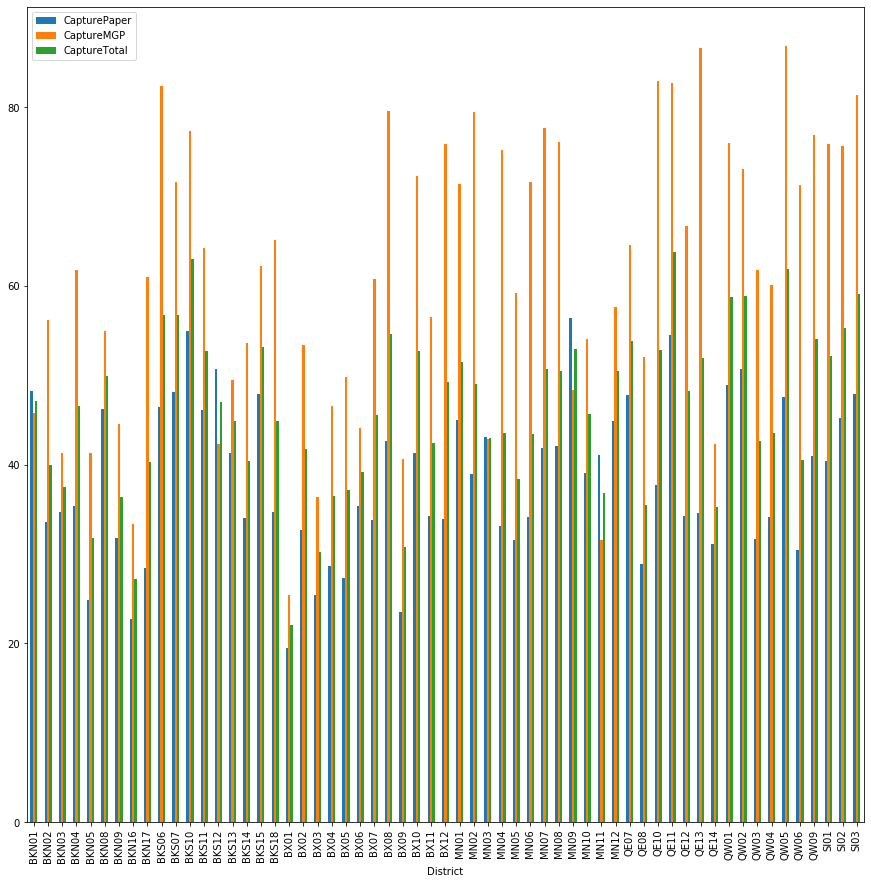

In [5]:
plt.figure(figsize= (15,15))
df.loc[:,["District","CapturePaper","CaptureMGP","CaptureTotal"]].groupby("District").mean().plot(kind="bar",figsize= (15,15))

In [6]:
print("Category-wise max recycling based on: ")
print("1. Mean")
df_g=df.loc[:,["District","CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]].groupby("District").mean()
for vname in ["CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]:
    dist = df_g.loc[:,vname].idxmax()
    print(f"dist:{dist},vname:{vname}")
print("2. Median")
df_g=df.loc[:,["District","CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]].groupby("District").median()
for vname in ["CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]:
    dist = df_g.loc[:,vname].idxmax()
    print(f"dist:{dist},vname:{vname}")
print("3. Mode")
def mymod(x):
    return scipy.stats.mode(x, axis=None)[0][0]
for vname in ["CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]:
    df_g=df.loc[:,["District",vname]].groupby("District").apply(mymod)
    dist = df_g.idxmax()
    print(f"dist:{dist},vname:{vname}")

Category-wise max recycling based on: 
1. Mean
dist:MN09,vname:CapturePaper
dist:QW05,vname:CaptureMGP
dist:QE11,vname:CaptureTotal
dist:BKS06,vname:DiversionRate
2. Median
dist:MN09,vname:CapturePaper
dist:QE13,vname:CaptureMGP
dist:BKS10,vname:CaptureTotal
dist:BKS06,vname:DiversionRate
3. Mode
dist:MN09,vname:CapturePaper
dist:BKS06,vname:CaptureMGP
dist:QW05,vname:CaptureTotal
dist:BKS06,vname:DiversionRate


vname:CapturePaper
vname:CaptureMGP
vname:CaptureTotal
vname:DiversionRate


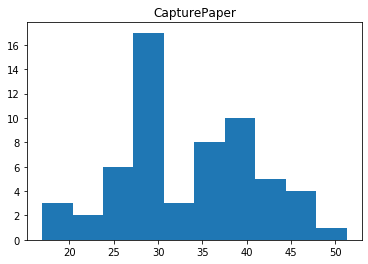

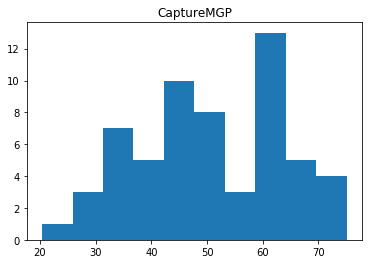

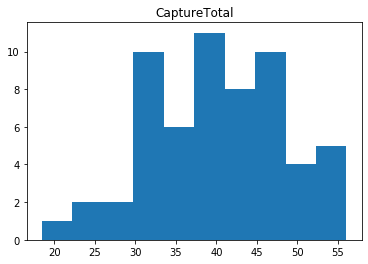

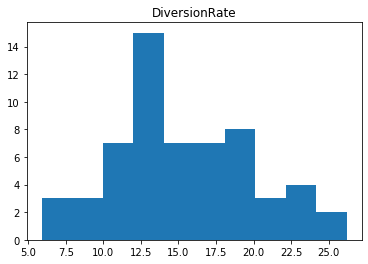

In [0]:
from scipy.stats import shapiro
# interpret
alpha = 0.05
for vname in ["CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]:
    df_g=df.loc[:,["District",vname]].groupby("District").apply(mymod)
    print(f"vname:{vname}")
    fig = plt.figure()
    plt.hist(df_g.values)
    plt.title(f"{vname}")

In [0]:
from scipy.stats import shapiro
# interpret
alpha = 0.05
print("Shapiro-Wilk test for normality.")
for vname in ["CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]:
    df_dist_g = df.loc[:,["District",vname]].groupby("District")
    idist     = 0 
    for dist, df_dist in df_dist_g:
        stat, p = shapiro(df_dist.loc[:,vname].values)
        if p < alpha:
            idist =idist+1
        #print(idist,p)
    print(f"{vname} has {idist/len(df_dist_g)*100.0:.2f} % counties rejected H0")

Shapiro-Wilk test for normality.
CapturePaper has 28.81 % counties rejected H0
CaptureMGP has 16.95 % counties rejected H0
CaptureTotal has 27.12 % counties rejected H0
DiversionRate has 45.76 % counties rejected H0


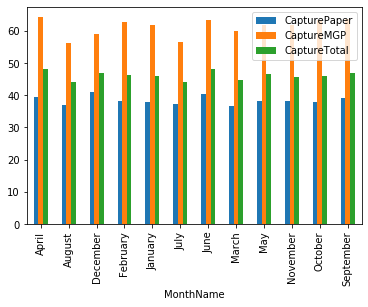

In [0]:
df.loc[:,["MonthName","CapturePaper","CaptureMGP","CaptureTotal"]].groupby("MonthName").mean().plot(kind="bar")

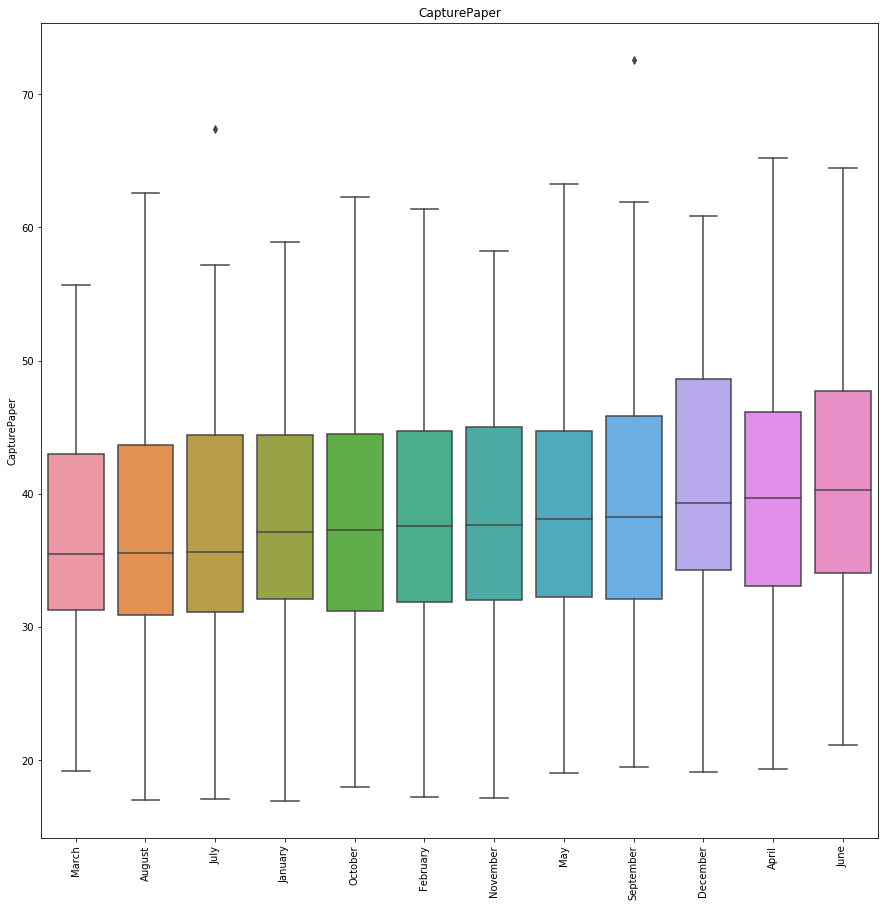

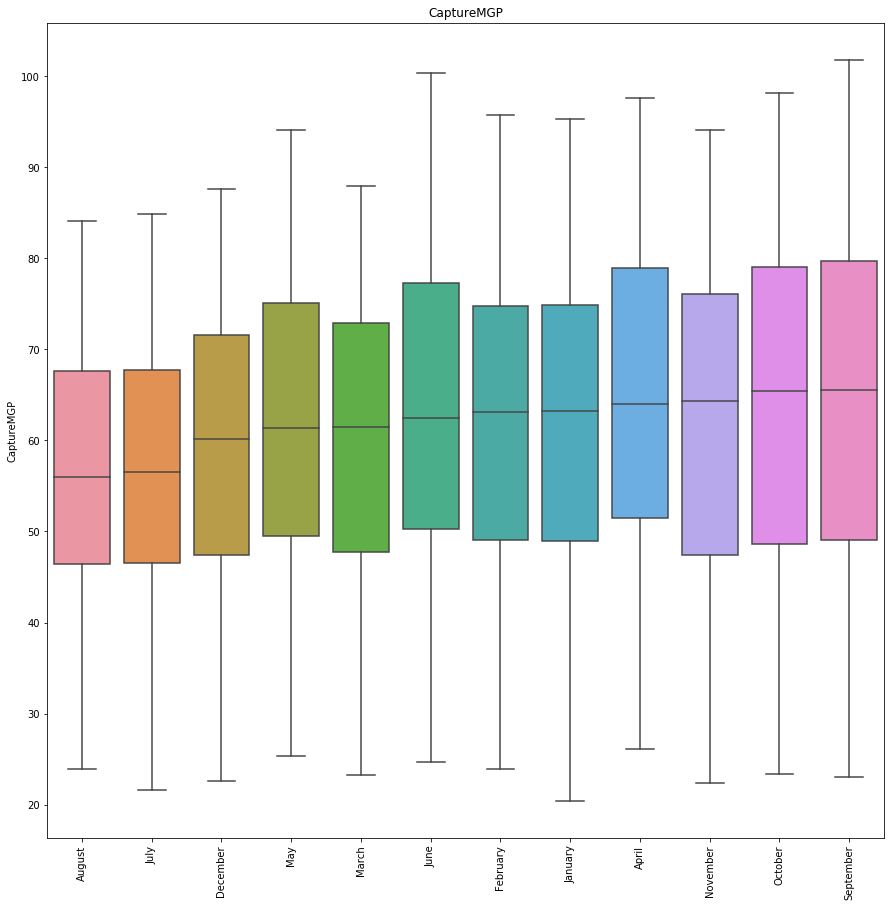

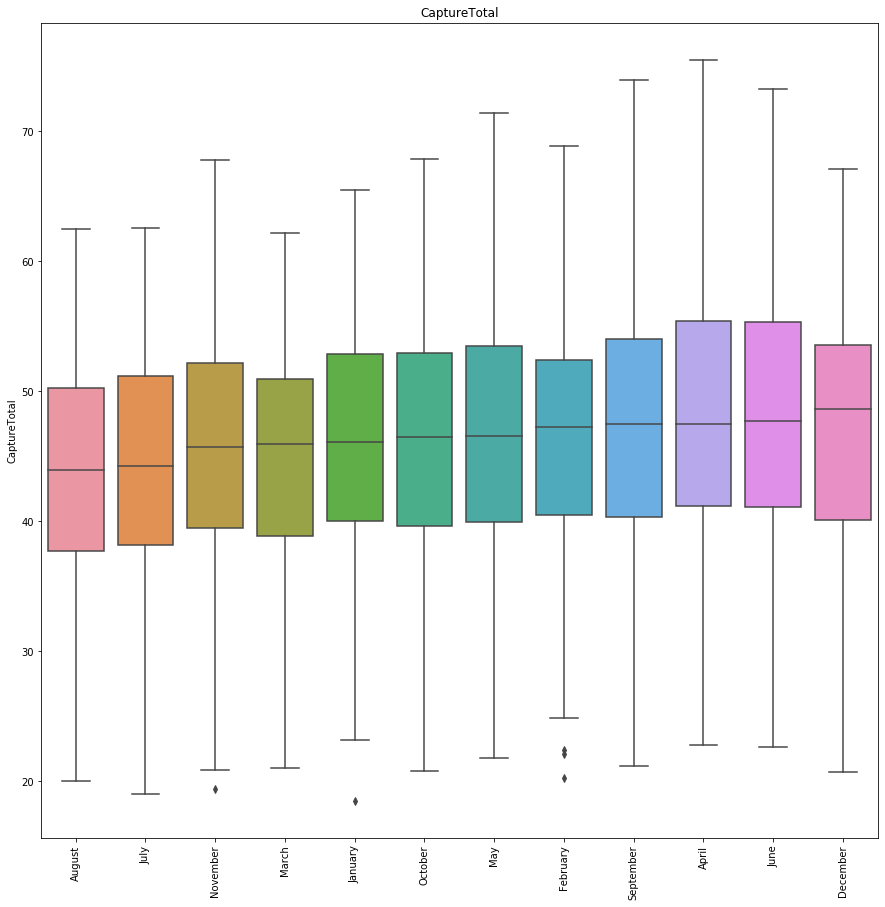

In [7]:
for vname in ["CapturePaper","CaptureMGP","CaptureTotal"]:
    plt.figure(figsize=(15, 15))
    meds = df.loc[:,[vname,"MonthName"]].groupby("MonthName").median().loc[:,vname].argsort().values
    # if you want to sort it by mean uncomment the following line
    # meds = df.loc[:,[vname,"MonthName"]].groupby("MonthName").mean().loc[:,vname].argsort().values
    meds = pd.unique(df.loc[:,"MonthName"])[meds]
    sns.boxplot(x="MonthName",y=vname,data=df,order=meds)

    plt.xticks( rotation='vertical')
    plt.title(vname)
    plt.xlabel("")

<Figure size 432x288 with 0 Axes>

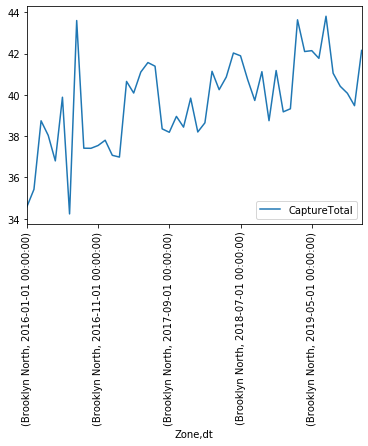

<Figure size 432x288 with 0 Axes>

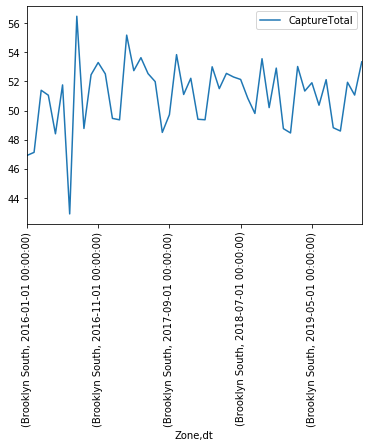

<Figure size 432x288 with 0 Axes>

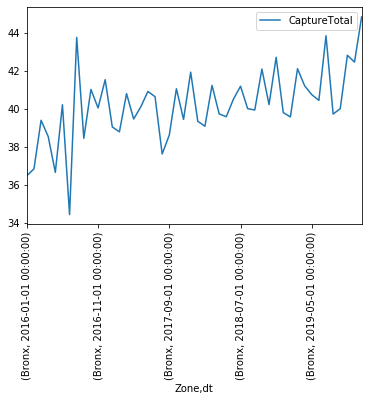

<Figure size 432x288 with 0 Axes>

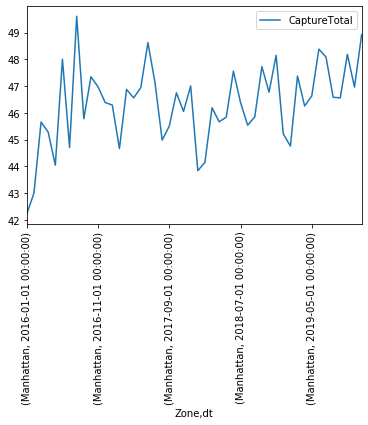

<Figure size 432x288 with 0 Axes>

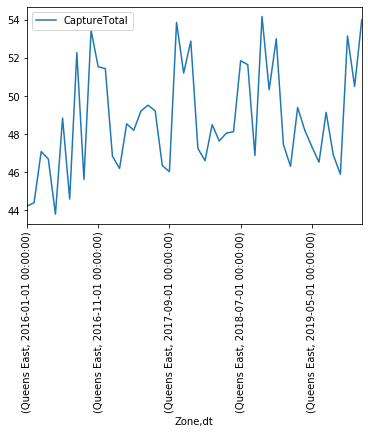

<Figure size 432x288 with 0 Axes>

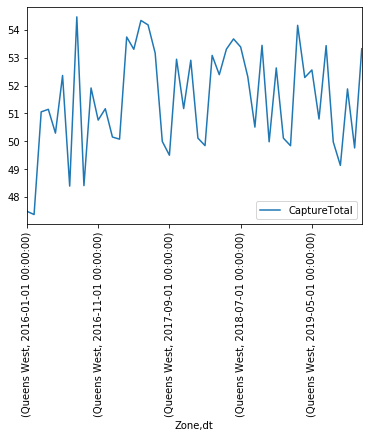

<Figure size 432x288 with 0 Axes>

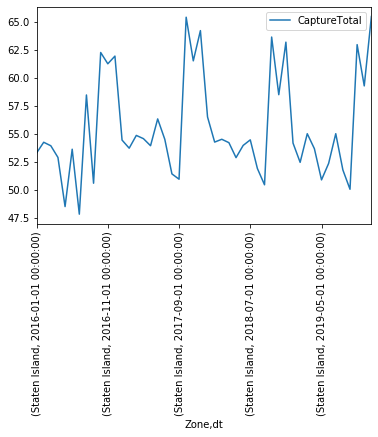

In [0]:
df_zone = df.loc[:,["CaptureTotal","dt","Zone"]].groupby(["Zone","dt"]).mean()
idx = pd.IndexSlice
for zone in pd.unique(df.Zone):
    plt.figure()
    df_zone.loc[idx[zone,:],:].plot()
    plt.xticks( rotation='vertical')

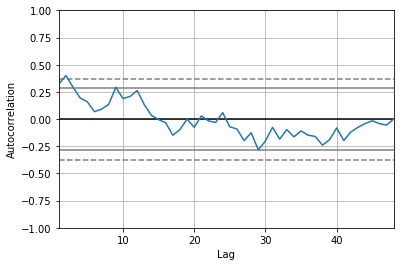

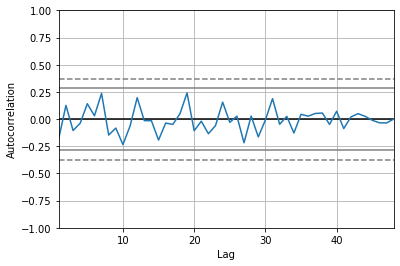

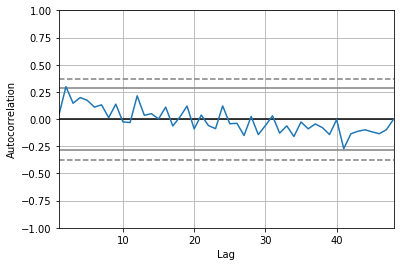

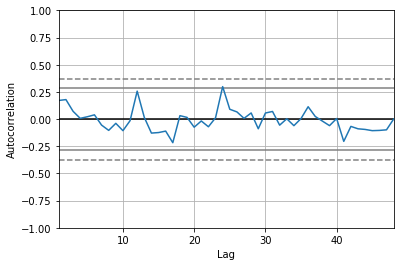

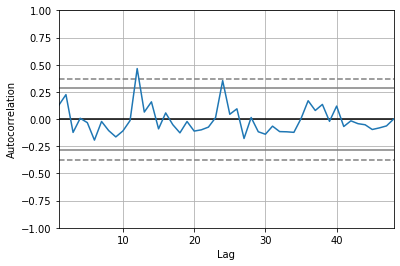

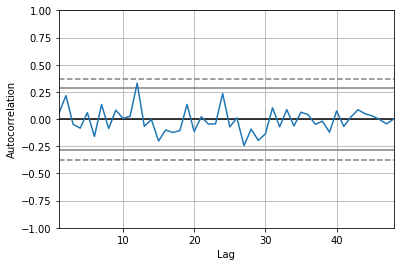

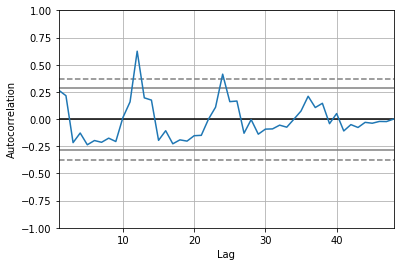

In [0]:
from pandas.plotting import autocorrelation_plot

df_zone = df.loc[:,["CaptureTotal","dt","Zone"]].groupby(["Zone","dt"]).mean()
idx = pd.IndexSlice
for zone in pd.unique(df.Zone):
    plt.figure()
    series=df_zone.loc[idx[zone,:],:]
    autocorrelation_plot(series)
    
    

In [0]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
df_zone = df.loc[:,["CaptureTotal","dt","Zone"]].groupby(["Zone","dt"]).mean()
idx = pd.IndexSlice

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                if p==0 and d==0 and q==0:
                    continue
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        best_order = order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    pass
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_order



In [0]:

# evaluate parameters
p_values = [0, 1, 2, 4, 5 ]
d_values = range(0, 3)
q_values = range(0, 3)
import warnings
warnings.filterwarnings("ignore")
orderbest = {}
for zone in pd.unique(df.Zone):
    print(zone)
    
    series=df_zone.loc[idx[zone,:],:]
    orderbest[zone]  = evaluate_models(series.values, p_values, d_values, q_values)

Brooklyn North
ARIMA(0, 0, 1) MSE=4.196
ARIMA(0, 0, 2) MSE=3.550
ARIMA(0, 1, 0) MSE=3.702
ARIMA(0, 1, 1) MSE=2.567
ARIMA(0, 2, 0) MSE=10.077
ARIMA(0, 2, 1) MSE=3.908
ARIMA(1, 0, 0) MSE=3.648
ARIMA(1, 1, 0) MSE=3.096
ARIMA(1, 1, 1) MSE=3.185
ARIMA(1, 2, 0) MSE=6.020
ARIMA(1, 2, 1) MSE=3.228
ARIMA(1, 2, 2) MSE=3.125
ARIMA(2, 0, 0) MSE=2.803
ARIMA(2, 0, 1) MSE=2.739
ARIMA(2, 1, 0) MSE=3.057
ARIMA(2, 1, 1) MSE=2.676
ARIMA(2, 1, 2) MSE=2.693
ARIMA(2, 2, 0) MSE=4.710
ARIMA(2, 2, 1) MSE=3.150
ARIMA(4, 0, 0) MSE=2.841
ARIMA(4, 0, 1) MSE=2.839
ARIMA(4, 0, 2) MSE=2.862
ARIMA(4, 1, 0) MSE=3.105
ARIMA(4, 1, 1) MSE=2.558
ARIMA(4, 1, 2) MSE=2.745
ARIMA(4, 2, 1) MSE=3.205
ARIMA(4, 2, 2) MSE=3.202
ARIMA(5, 0, 0) MSE=2.937
ARIMA(5, 0, 1) MSE=2.924
ARIMA(5, 0, 2) MSE=2.978
ARIMA(5, 1, 0) MSE=3.165
ARIMA(5, 1, 1) MSE=2.374
ARIMA(5, 1, 2) MSE=2.581
ARIMA(5, 2, 1) MSE=3.784
Best ARIMA(5, 1, 1) MSE=2.374
Brooklyn South
ARIMA(0, 0, 1) MSE=2.775
ARIMA(0, 0, 2) MSE=2.969
ARIMA(0, 1, 0) MSE=6.705
ARIMA(0, 1, 1)

Brooklyn North
                             ARIMA Model Results                              
Dep. Variable:         D.CaptureTotal   No. Observations:                   47
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -91.540
Method:                       css-mle   S.D. of innovations              1.609
Date:                Sat, 22 Feb 2020   AIC                            199.081
Time:                        20:37:38   BIC                            213.882
Sample:                             1   HQIC                           204.651
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1012      0.014      7.274      0.000       0.074       0.128
ar.L1.D.CaptureTotal    -0.0579      0.147     -0.394      0.696      -0.346       0.2

<Figure size 432x288 with 0 Axes>

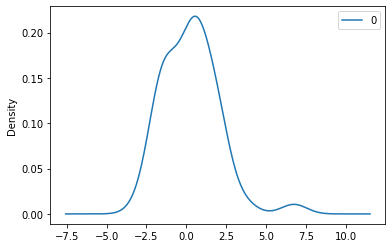

<Figure size 432x288 with 0 Axes>

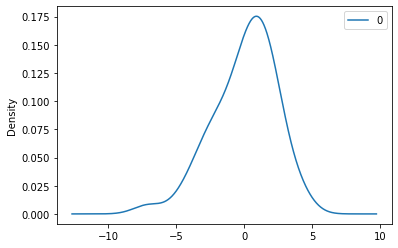

<Figure size 432x288 with 0 Axes>

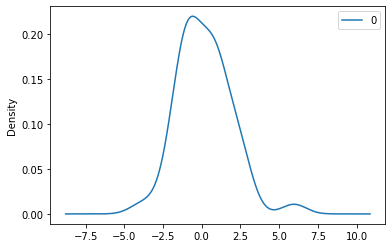

<Figure size 432x288 with 0 Axes>

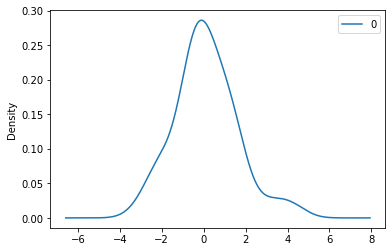

<Figure size 432x288 with 0 Axes>

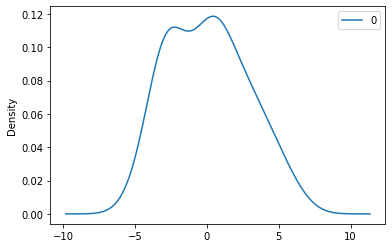

<Figure size 432x288 with 0 Axes>

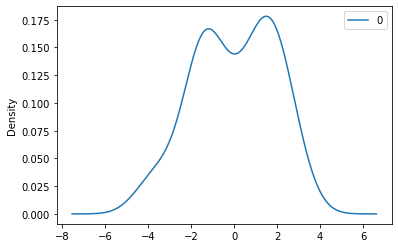

<Figure size 432x288 with 0 Axes>

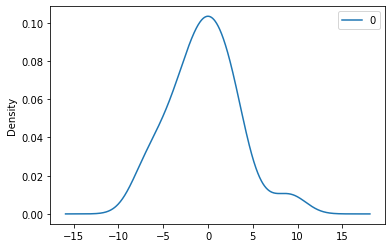

In [0]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
df_zone = df.loc[:,["CaptureTotal","dt","Zone"]].groupby(["Zone","dt"]).mean()
idx = pd.IndexSlice
for zone in pd.unique(df.Zone):
    
    series=df_zone.loc[idx[zone,:],:]
    model = ARIMA(series, order=orderbest[zone])
    model_fit = model.fit(disp=0)
    print(zone)
    print(model_fit.summary())
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    plt.figure()
    residuals.plot(kind='kde')
    print(residuals.describe())

In [0]:
!pip install fbprophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


17.130435050787415 Brooklyn North


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


35.569951651296016 Brooklyn South


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


16.966451192064074 Bronx


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


13.01811987590779 Manhattan


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


19.157860662213526 Queens East


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 23.


14.666468260779828 Queens West
37.12971748220769 Staten Island


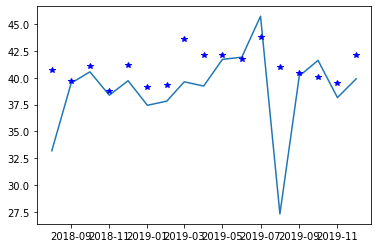

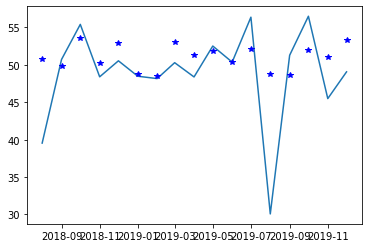

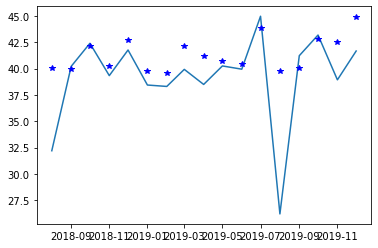

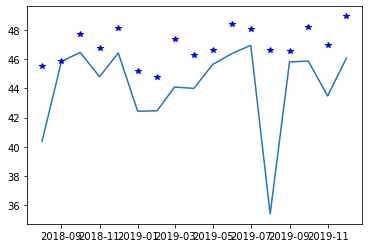

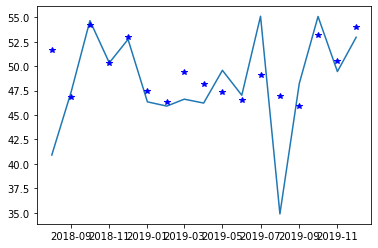

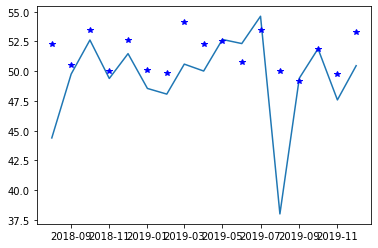

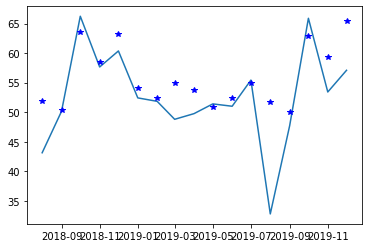

In [0]:
from fbprophet import Prophet

from sklearn.metrics import mean_squared_error

df_zone = df.loc[:,["CaptureTotal","dt","Zone"]].groupby(["Zone","dt"]).mean()
idx = pd.IndexSlice
for zone in pd.unique(df.Zone):
    
    series = df_zone.loc[idx[zone,:],:]
    df_sub = pd.DataFrame(data=dict(y=series["CaptureTotal"].values,ds=series.index.get_level_values(1)) )
    m = Prophet()
    train_size = int(len(df_sub.index) * 0.66)
    train, test = df_sub.iloc[0:train_size,:] , df_sub.iloc[train_size:,:]
    
    m.fit(train)
    forecast = m.predict(test)
    fig, ax = plt.subplots()
    plt.plot(test.ds,forecast.yhat,)
    plt.plot(test.ds,test.y,marker="*",color="b",linestyle="None")
    mse_value = mean_squared_error(forecast.yhat,test.y)
    print(mse_value,zone)
    #ax.text(0.1, 0.9, f'zone= {zone}, mse={mse_value}',fontsize=7,
    #         verticalalignment='bottom', horizontalalignment='left')



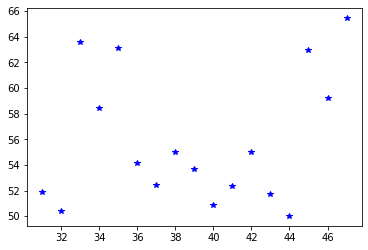

In [0]:
plt.plot(,marker="*",color="b",linestyle="None")

In [0]:
test

,y,ds
31,51.892788,2018-08-01
32,50.442918,2018-09-01
33,63.615677,2018-10-01
34,58.476310,2018-11-01
35,63.161133,2018-12-01
36,54.161874,2019-01-01
37,52.443992,2019-02-01
38,54.997026,2019-03-01
39,53.662654,2019-04-01
40,50.880287,2019-05-01


In [0]:
test["ds"]

31   2018-08-01
32   2018-09-01
33   2018-10-01
34   2018-11-01
35   2018-12-01
36   2019-01-01
37   2019-02-01
38   2019-03-01
39   2019-04-01
40   2019-05-01
41   2019-06-01
42   2019-07-01
43   2019-08-01
44   2019-09-01
45   2019-10-01
46   2019-11-01
47   2019-12-01
Name: ds, dtype: datetime64[ns]

In [0]:
len(test.index)

17

In [0]:
meds

array(['August', 'July', 'November', 'March', 'January', 'October', 'May',
       'February', 'September', 'April', 'June', 'December'], dtype=object)

Bronx 576
Brooklyn North 432
Brooklyn South 432
Manhattan 576
Queens East 336
Queens West 336
Staten Island 144


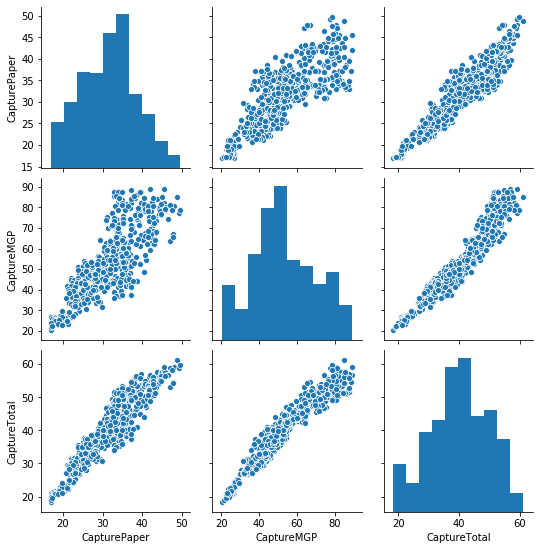

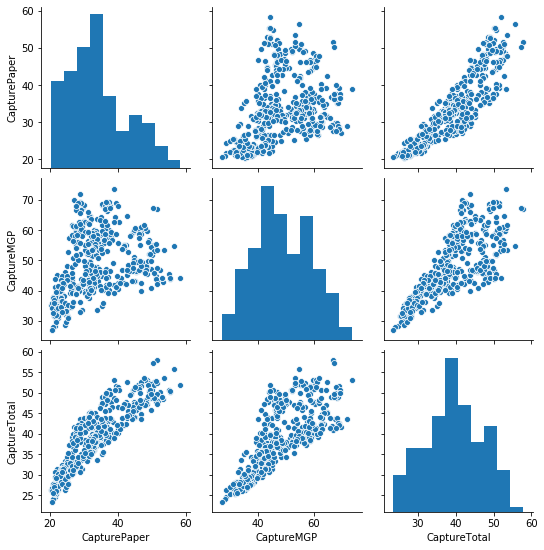

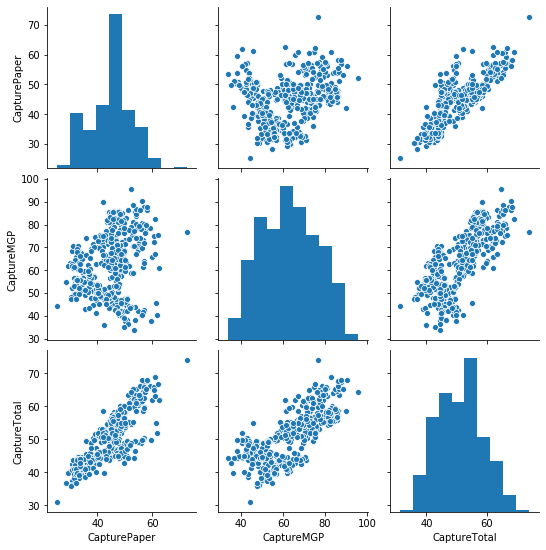

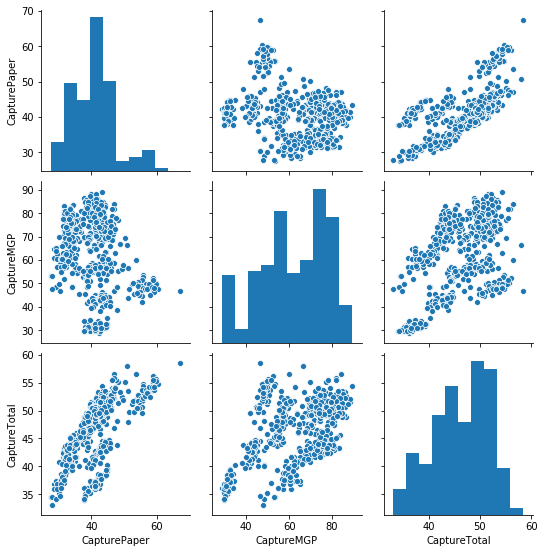

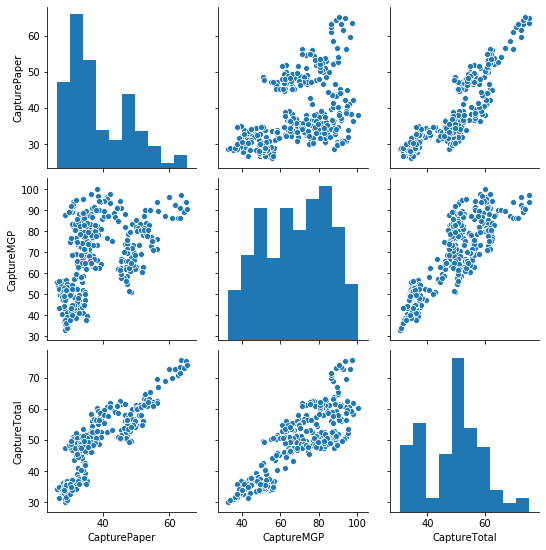

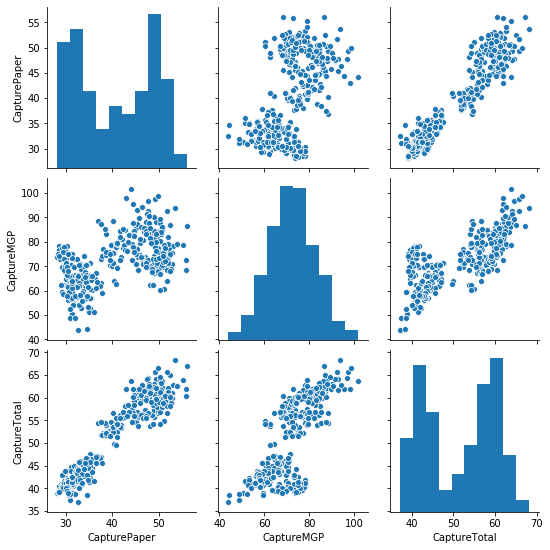

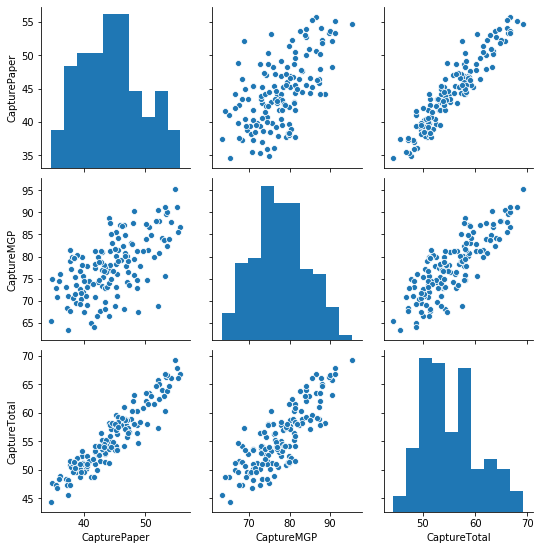

In [0]:
for zone,df_sub in df.loc[:,["Zone","CapturePaper","CaptureMGP","CaptureTotal"]].groupby("Zone"):
    print(zone,len(df_sub.index))
    sns.pairplot(df_sub)
    #df_sub.plot()

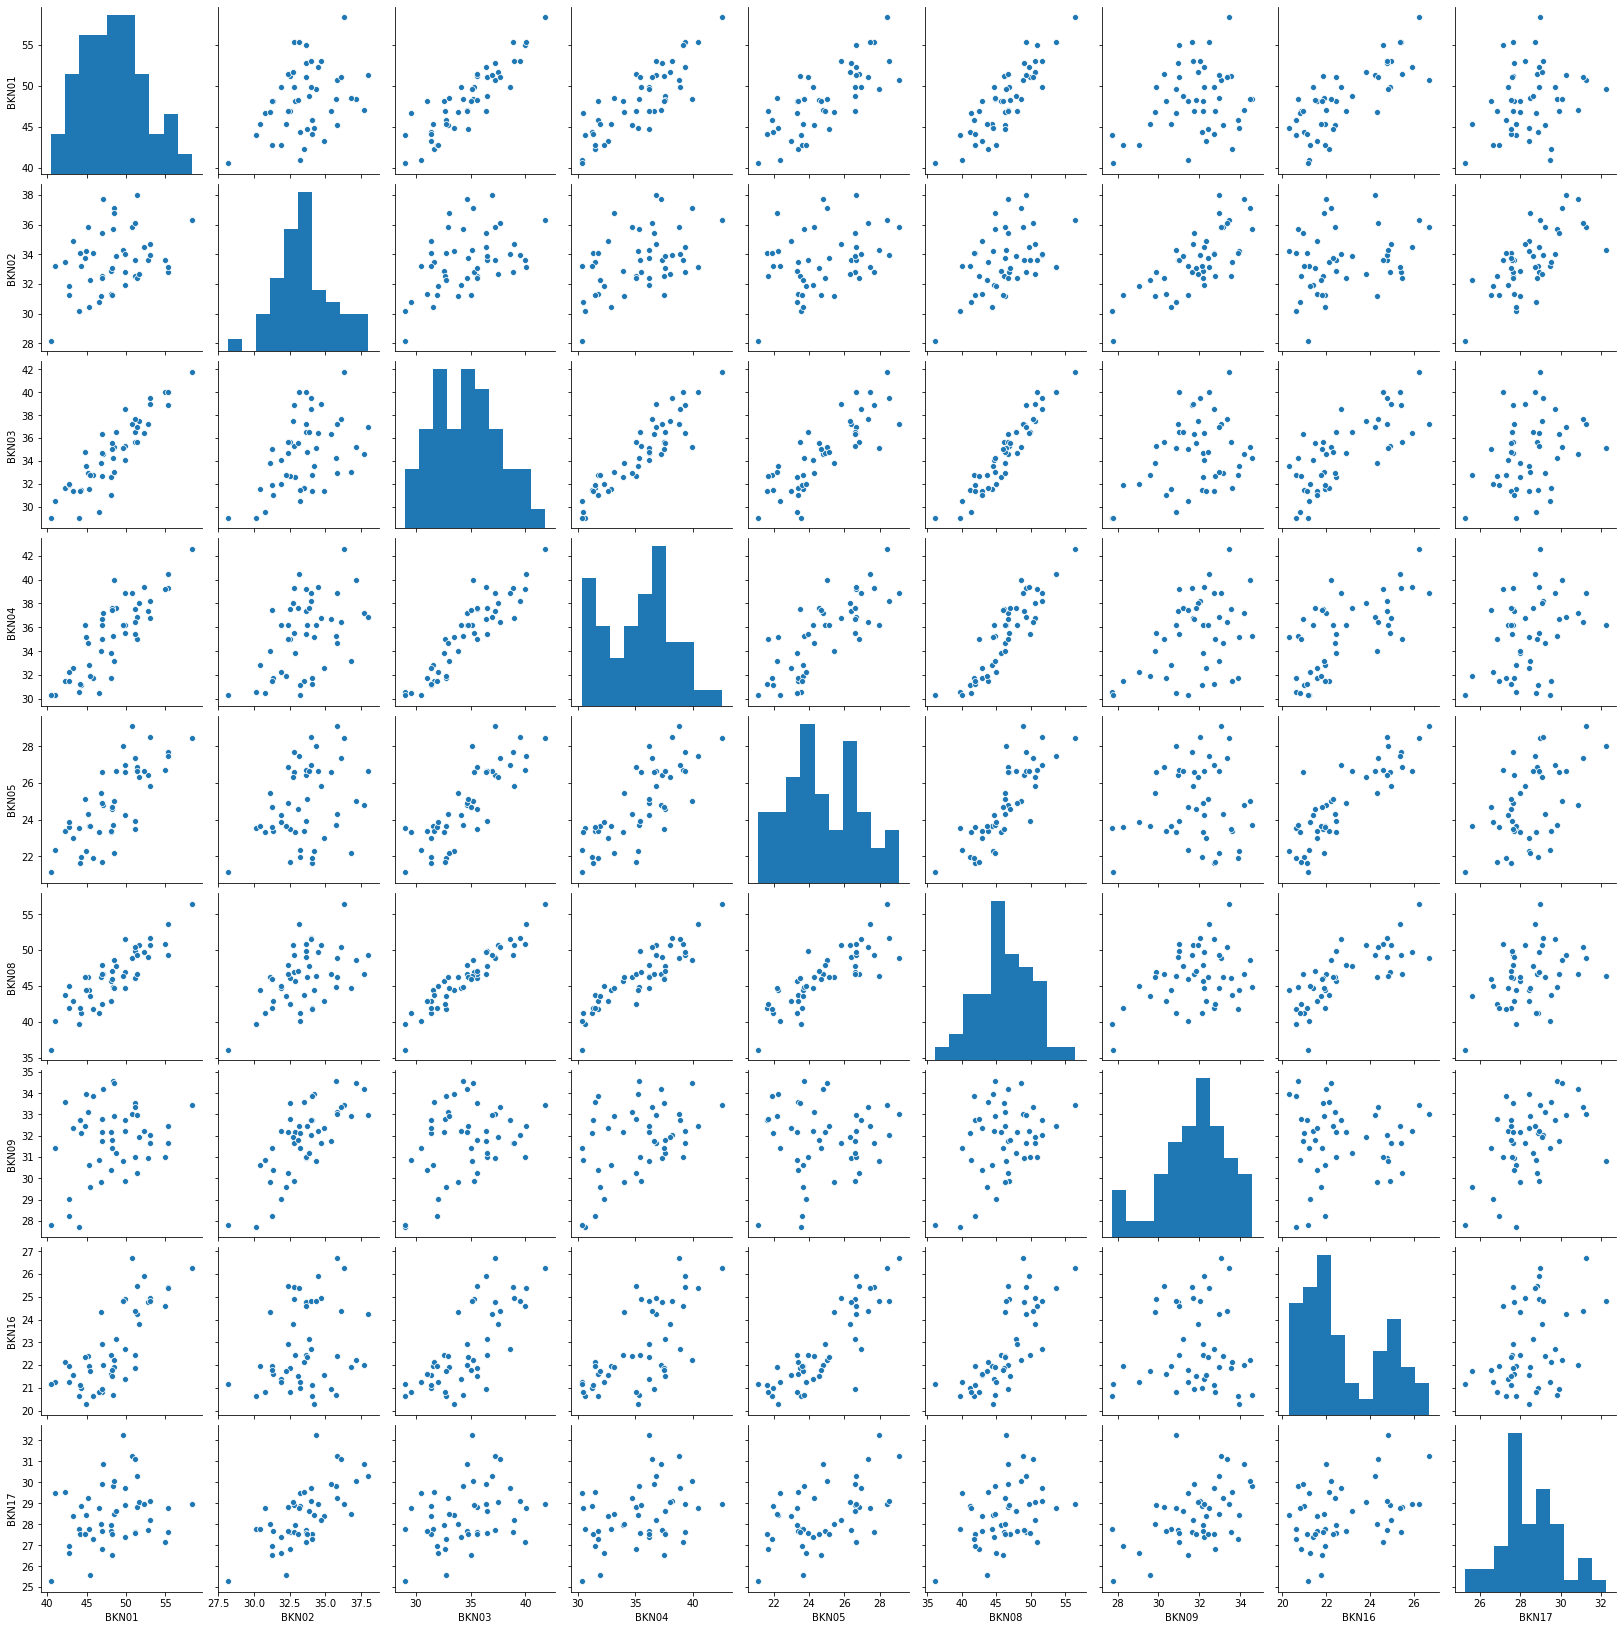

In [0]:

df["YM"] = ["%s-%s"%(FiscalMonth,FiscalYear) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]

df_zone=df[df["Zone"]=="Brooklyn North"].pivot(values="CapturePaper",columns="District",index="YM")
sns.pairplot(df_zone)

Brooklyn North
Brooklyn South
Bronx
Manhattan
Queens East
Queens West
Staten Island


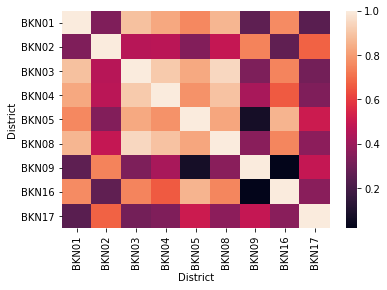

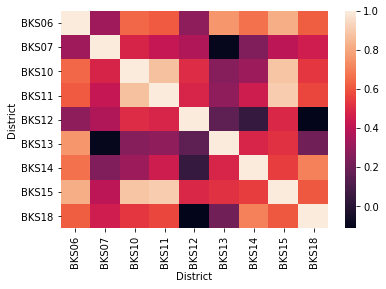

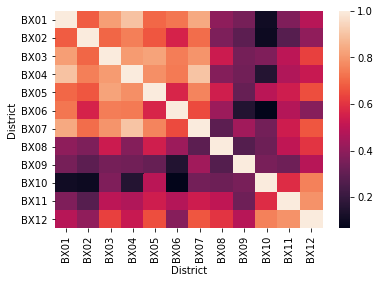

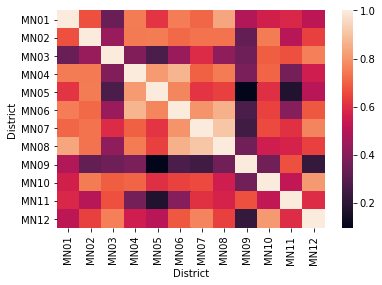

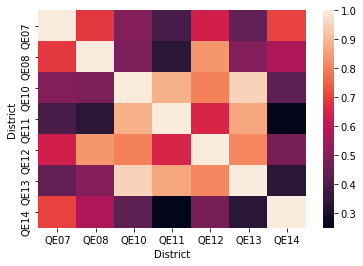

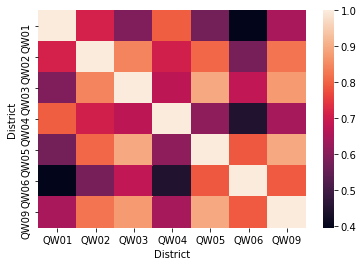

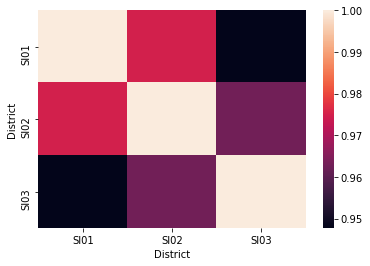

In [0]:
import matplotlib.pyplot as plt

for zone in pd.unique(df["Zone"]):
    df_zone=df[df["Zone"]==zone].pivot(values="CapturePaper",columns="District",index="YM")
    fig = plt.figure()
    print(zone)
    sns.heatmap(df_zone.corr())

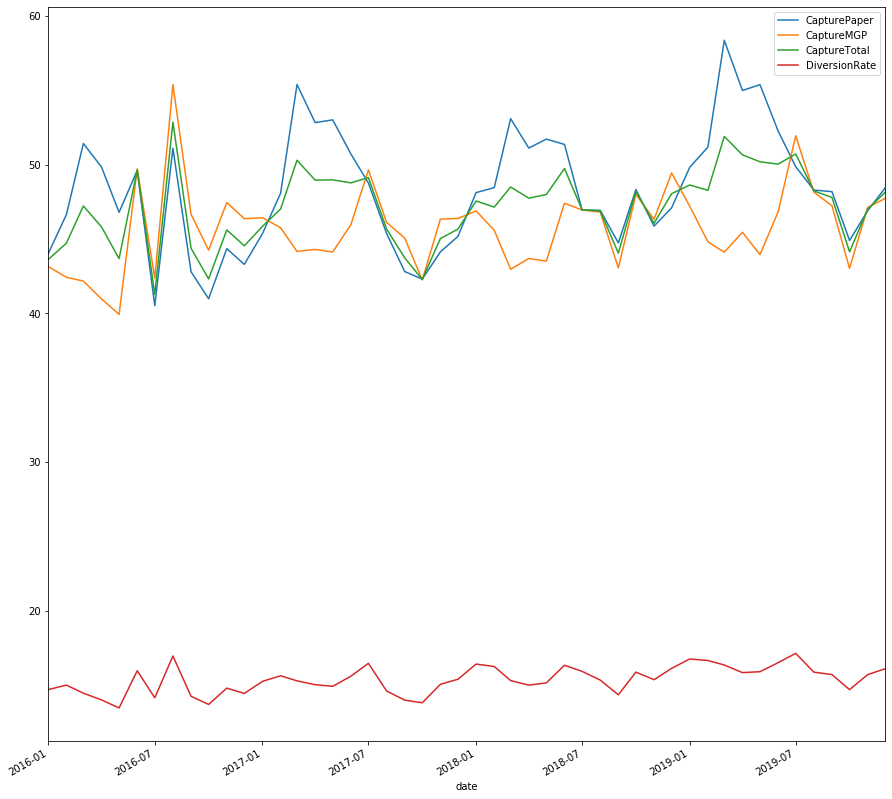

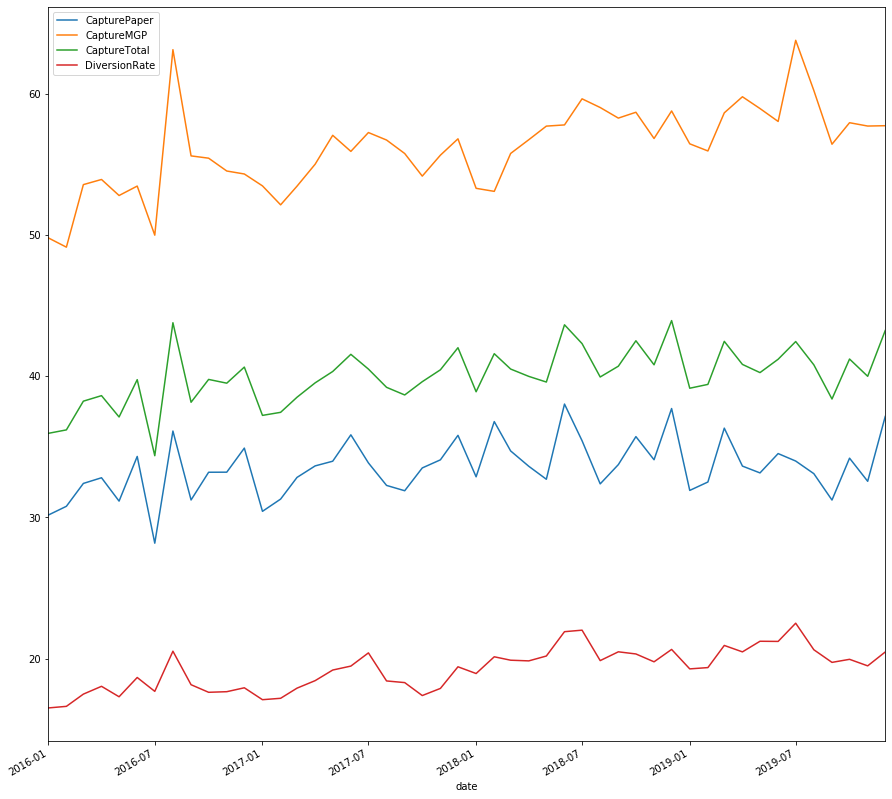

In [8]:
df_dist_g = df.loc[:,["District","CapturePaper","CaptureMGP","CaptureTotal","DiversionRate"]].groupby("District")
for idist,(dist,df_dist) in enumerate(df_dist_g):
    if idist <2:
        df_dist.plot(figsize = (15, 15))

In [0]:
from datetime import datetime
df["YM"] = ["%s-%s"%(FiscalMonth,FiscalYear) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]
df["date"] = [datetime(FiscalYear,FiscalMonth,1) for (FiscalMonth,FiscalYear) in zip(df["FiscalMonth"],df["FiscalYear"])]
df.set_index("date",inplace=True)

In [0]:
df.head()

,Zone,District,FiscalMonth,FiscalYear,MonthName,DiversionRate,CapturePaper,CaptureMGP,CaptureTotal,YM,dt
date,,,,,,,,,,,
2019-10-01,Brooklyn North,BKN01,10,2019,April,14.687093,44.909160,43.034062,44.146764,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN02,10,2019,April,19.950181,34.194020,57.947031,41.213700,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN03,10,2019,April,12.164161,33.521557,44.919731,38.155937,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN04,10,2019,April,15.541803,35.211361,68.511260,48.750755,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN05,10,2019,April,10.051845,22.265430,45.051791,31.530129,10-2019,2019-10-01


In [0]:
df.head()

,Zone,District,FiscalMonth,FiscalYear,MonthName,DiversionRate,CapturePaper,CaptureMGP,CaptureTotal,YM,dt
date,,,,,,,,,,,
2019-10-01,Brooklyn North,BKN01,10,2019,April,14.687093,44.909160,43.034062,44.146764,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN02,10,2019,April,19.950181,34.194020,57.947031,41.213700,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN03,10,2019,April,12.164161,33.521557,44.919731,38.155937,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN04,10,2019,April,15.541803,35.211361,68.511260,48.750755,10-2019,2019-10-01
2019-10-01,Brooklyn North,BKN05,10,2019,April,10.051845,22.265430,45.051791,31.530129,10-2019,2019-10-01


In [0]:
!ls /content/drive

'My Drive'  'Shared drives'
